<a href="https://colab.research.google.com/github/YoooonaLee/machine_learning/blob/main/DT_%26_RF_%26_KNN__iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [4]:
# 필수 라이브러리 설치 및 불러오기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
import numpy as np
import pandas as pd
from sklearn import metrics
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [ ]:


# 아이리스 데이터셋 로드 및 데이터프레임 변환
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # 레이블을 새로운 열로 추가


X = df[iris.feature_names]  # 모든 행과 특성 열 선택
y = df['target']            # 타깃 열

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
y_train.value_counts()

,count
target,
0,40
2,40
1,40


In [ ]:
y_test.value_counts()

,count
target,
0,10
2,10
1,10


#CH1.🌳결정 트리 아이리스 데이터 분류



* Max-depth:
트리의 최대 깊이

* Min-samples-split:
노드를 분할할 때 필요한 최소 샘플 수.

* Min-samples-leaf:
 리프 노드에 있어야 할 최소 샘플 수

* Max-features:
각 노드에서 분할에 사용할 최대 피처 수.

In [ ]:
# 결정 트리 모델 생성
dcs_tree = DecisionTreeClassifier(max_depth =5, min_samples_split=10, random_state=42)
                                  #⭐ max_depth를 적당히 조절해서 오버피팅 방지

# 모델 학습
dcs_tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [ ]:
# 테스트 데이터에 대한 예측 수행
y_pred = dcs_tree.predict(X_test)
y_pred


array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [ ]:
# 모델 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"결정 트리 모델의 정확도: {accuracy * 100:.2f}%")


결정 트리 모델의 정확도: 96.67%


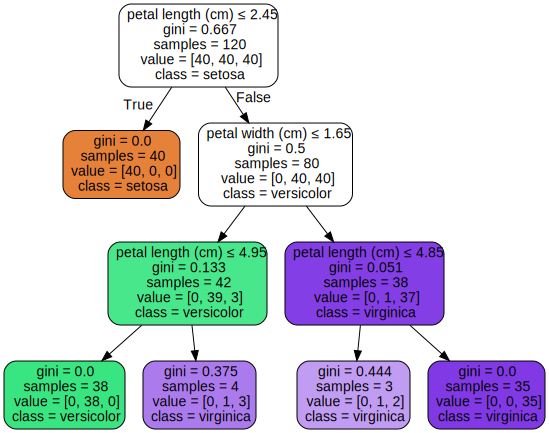

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# 결정 트리 시각화
dot_data = export_graphviz(dcs_tree, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # 트리를 파일로 저장
graph  # 트리 출력


📚max depth를 5로 설정했음에도 min_split 파라미터때문에 depth 4에서 끝남.

 스플릿가능한 노드가 완전 pure하기때문에 depth가 더 이어질 수가 없음.

In [ ]:
# 트리의 구조정보 뽑아오기
n_nodes = dcs_tree.tree_.node_count #트리에 있는 총 노드(정점)의 수
children_left = dcs_tree.tree_.children_left #각 노드의 왼쪽 자식 노드의 인덱스를 저장한 배열
children_right = dcs_tree.tree_.children_right
feature = dcs_tree.tree_.feature #각 노드에서 분할에 사용된 특성의 인덱스를 저장한 배열
impurity = dcs_tree.tree_.impurity # 노드의 불순도를 저장한 배열
n_node_samples = dcs_tree.tree_.n_node_samples # 노드의 샘플 수를 저장한 배열

In [ ]:
n_nodes

9

In [ ]:
children_left
 # 어떤 부모노드의 왼쪽자식노드 인덱스 배열!!

array([ 1, -1,  3,  4, -1, -1,  7, -1, -1], dtype=int64)

In [ ]:
children_right
# 어떤 부모노드의 오른쪽자식노드 인덱스 배열!!

array([ 2, -1,  6,  5, -1, -1,  8, -1, -1], dtype=int64)

In [ ]:
feature
#각 노드마다 사용된 피처의 인덱스 배열!!

array([ 2, -2,  3,  2, -2, -2,  2, -2, -2], dtype=int64)

In [ ]:
impurity
 #노드 11개 마다의 impurity
 # /불순도 0인 값은 완전한 분류를 이룬 노드들

array([0.66666667, 0.        , 0.5       , 0.13265306, 0.        ,
       0.375     , 0.05124654, 0.44444444, 0.        ])

In [ ]:
n_node_samples
 # 각각 11개의 노드마다 몇개의 샘플들이 할당되었는지 확인

array([120,  40,  80,  42,  38,   4,  38,   3,  35], dtype=int64)

##✅Information gain 출력 함수

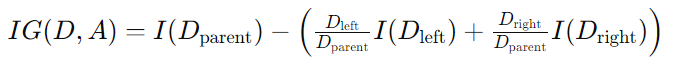

In [ ]:
#####################################💹 위에 트리구조정보 이용해서 IG 계산함수 선언#########################################3

def calculate_information_gain(tree, node):
    # 자식 노드가 없으면 IG는 0
    if children_left[node] == children_right[node]:
        return 0

    parent_impurity = impurity[node]  # 부모 노드 불순도

    # 자식 노드들의 불순도
    left_impurity = impurity[children_left[node]]
    right_impurity = impurity[children_right[node]]

    # 자식 노드들의 샘플 비율
    left_fraction = n_node_samples[children_left[node]] / n_node_samples[node]
    right_fraction = n_node_samples[children_right[node]] / n_node_samples[node]

    # 자식 노드들의 가중 불순도 합
    weighted_impurity = (left_fraction * left_impurity + right_fraction * right_impurity)

    # 정보 이득 계산
    IG = parent_impurity - weighted_impurity
    return IG

########################## chat GPT ########################
# 노드 정보 출력
print(f"{'Index':<6}{'Node':<6}{'Feature':<12}{'Impurity':<12}{'Samples':<10}{'IG':<10}")
print("-" * 50)

for node in range(n_nodes):
    # 리프 노드는 건너뜀
    if children_left[node] == children_right[node]:
       continue

    # 분할에 사용된 피처 이름 (수정됨)
    if feature[node] != -2:  # -2는 리프 노드를 나타냄
        feature_name = iris.feature_names[feature[node]]
    else:
        feature_name = "Leaf"

    # 정보 이득 계산
    info_gain = calculate_information_gain(dcs_tree.tree_, node)

    # 각 노드의 정보 출력
    print(f"{node:<6}{node:<6}{feature_name:<12}{impurity[node]:<12.4f}{n_node_samples[node]:<10}{info_gain:<10.4f}")


Index Node  Feature     Impurity    Samples   IG        
--------------------------------------------------
0     0     petal length (cm)0.6667      120       0.3333    
2     2     petal width (cm)0.5000      80        0.4060    
3     3     petal length (cm)0.1327      42        0.0969    
6     6     petal length (cm)0.0512      38        0.0162    


스플릿된 노드의 인덱스중 노드 2번의 IG값이 0.4060으로 가장 높은값을 보임.


##✅feature importance로 피처 중요도 확인해보기


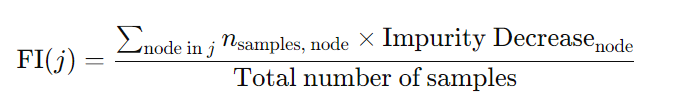

* n_samples, node:  노드에서의 샘플 수

* Impurity Decrease_node:  해당 노드에서의 불순도 감소량

In [ ]:
dcs_tree.feature_importances_

array([0.        , 0.        , 0.57907728, 0.42092272])

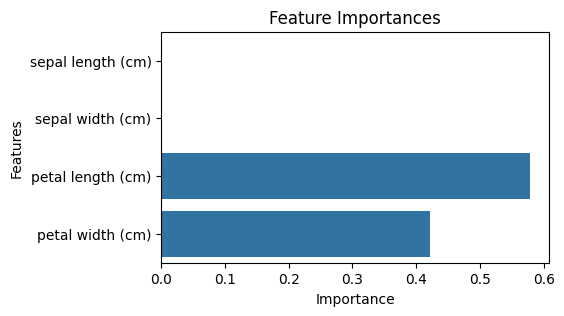

In [ ]:

# 특성 중요도 시각화
plt.figure(figsize=(5, 3))
sns.barplot(x=dcs_tree.feature_importances_, y=iris.feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


📚 petal length가 가장 높은 중요도를 보임.

1번의 노드에서만 사용됐는데도 IG값이 0.4060으로 가장 높은 petal width도 높은 feature 중요도를 보인다.

##DT 결정경계면 그려보기 _ feature importance가 높은 2개의 피처만 사용⭐


>📑자식노드로 스플릿되는 과정에서 **하나의 특성**에 대해서만 트레이닝되기때문에 분류경계면이 항상 **축에 평행한 형태**로 나옴

#           

---



아까 min_split 파라미터때문에 depth 변수가 적용이 잘 안되었기때문에 우선은 max_depth만 변수로 두고 iteration


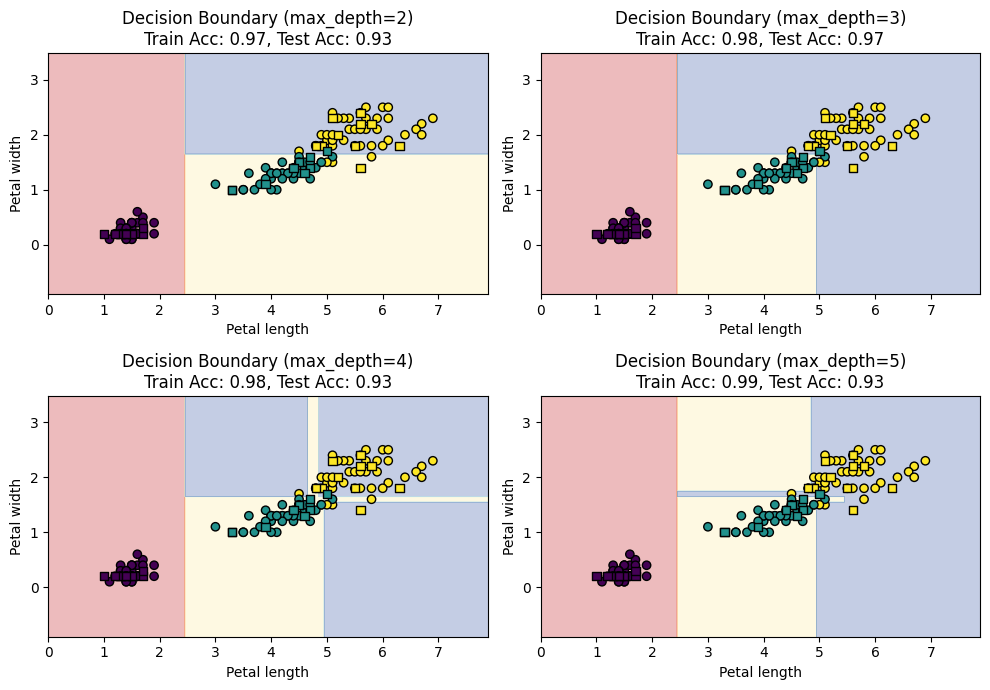

In [ ]:
# 데이터 로드 및 준비
iris = load_iris()
X = iris.data[:, [2, 3]]  # 꽃잎 길이와 너비만 사용⭐
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



# x, y 범위 설정
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 2x2 그리드로 플롯 설정
fig, axs = plt.subplots(2, 2, figsize=(10, 7))



# max_depth 값들 (2, 3, 4, 5로 변경)⭐
depths = [2, 3, 4, 5]
# 각 max_depth에 대한 모델 학습 및 시각화
for i, depth in enumerate(depths):
    # 모델 생성 및 학습
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # 예측
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 훈련 데이터에 대한 정확도
    train_accuracy = clf.score(X_train, y_train)
    # 테스트 데이터에 대한 정확도
    test_accuracy = clf.score(X_test, y_test)
    #⭐ 트레인/테스트 데이터에서의 accuracy 각각 확인

    # 결정 경계 시각화
    ax = axs[i // 2, i % 2]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='s', label='Test')
    ax.set_title(f'Decision Boundary (max_depth={depth})\nTrain Acc: {train_accuracy:.2f}, Test Acc: {test_accuracy:.2f}')
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')

plt.tight_layout()
plt.show()


## 오버피팅이 발생된 시점인 max depth=[4,5]만 출력해보기

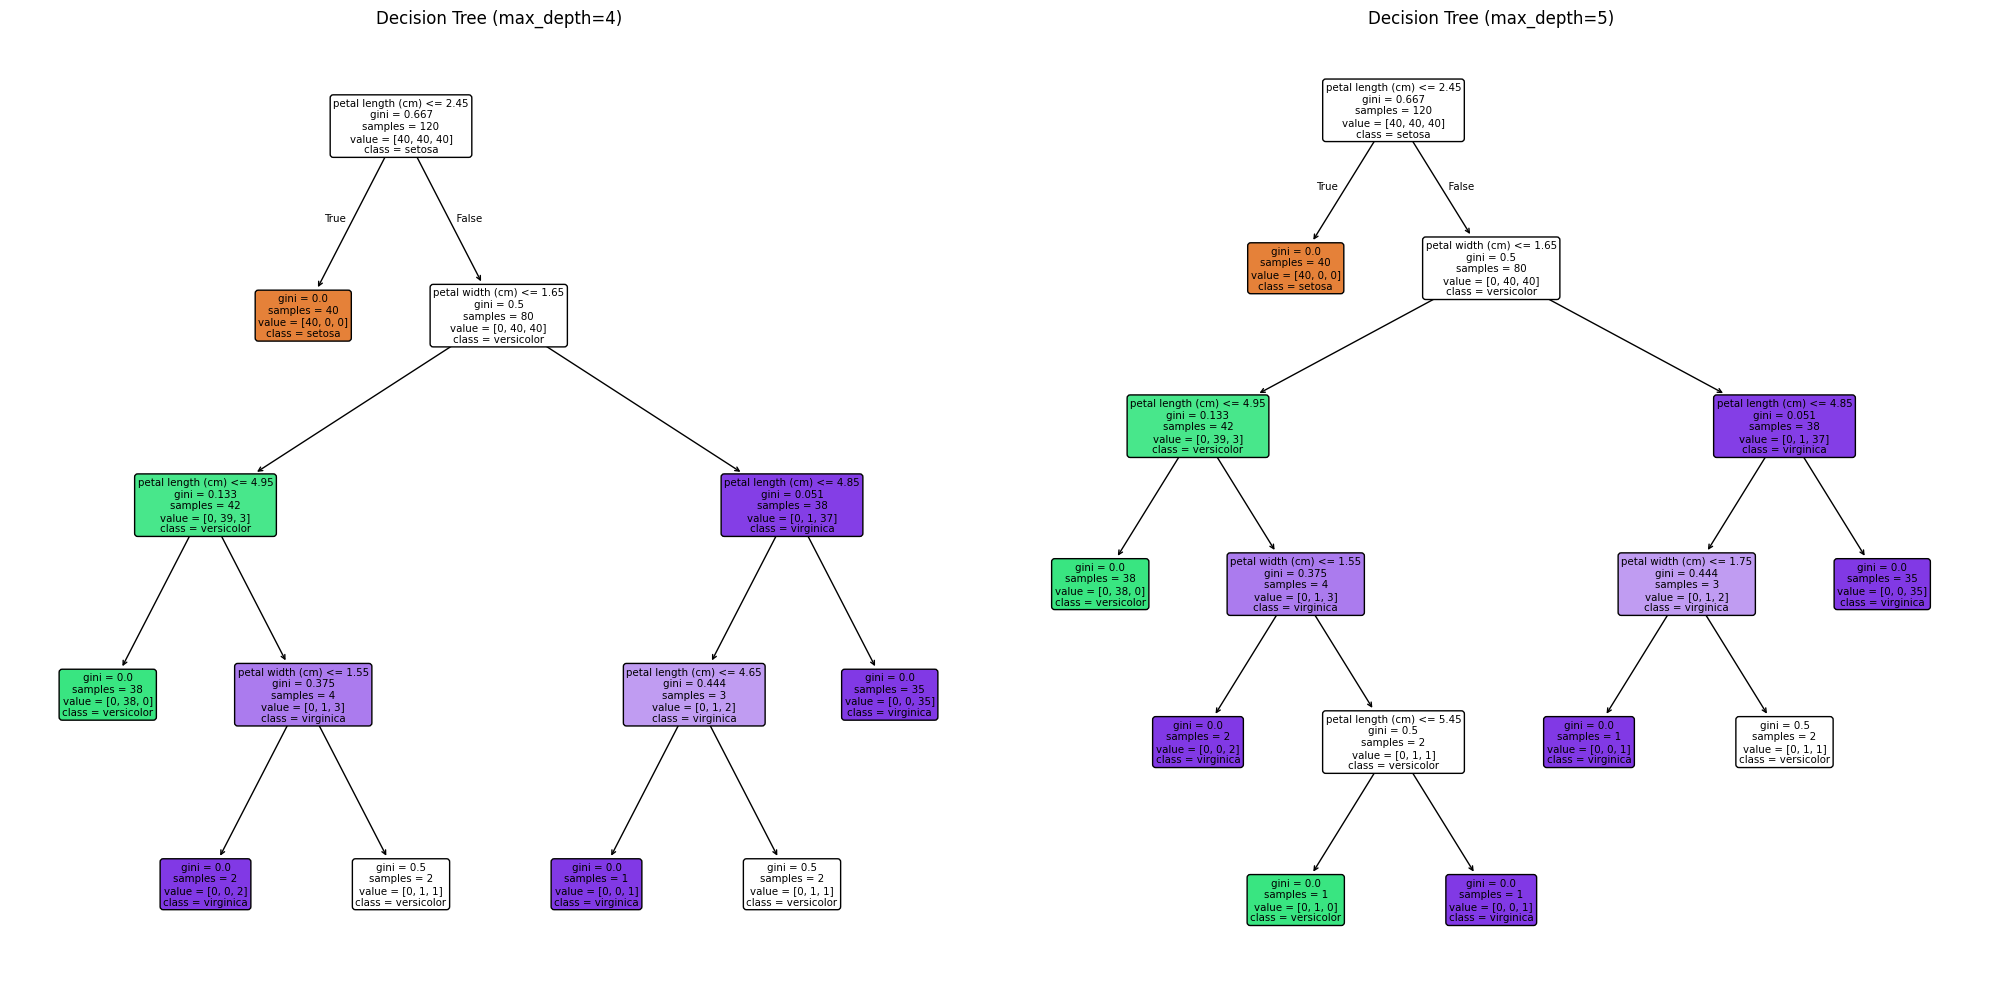

In [ ]:
# 트리 시각화를 더 큰 크기로 설정
depths = [4,5]#⭐
plt.figure(figsize=(20, 10))  # 그림 크기 조정

for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    plt.subplot(1, 2, i + 1)  # 한 줄에 두 플롯 배치
    plot_tree(clf, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True)
    plt.title(f'Decision Tree (max_depth={depth})')

plt.tight_layout()
plt.show()


📚depth만 파라미터로 놨을때 깊이 5까지 도달해야 완전 pure해짐

=>결정트리는 트리 하나만 가지고 분류하는 모델이기때문에 오버피팅이 발생하지 않도록 다양한 파라미터 튜닝이 굉장히 중요하겠다.

#CH2.🌳🌲랜덤포레스트🌲🌳:( 앙상블로 확장) 아이리스 데이터 분류


DT를 앙상블로 확장한 모델!

> 결국엔 성능이 적당히 낮은(조금 더 정확히는 편향되지 않은)결정 트리들을 여러개 만들고 그 결정트리들의 다수결에 의해서 클래스를 결정하는 로직


📚랜덤포레스트 결정트리는 depth를 적당히 작게 유지해야함.
적당한 성능의 개별트리를 많이 만드는게 가장 중요하기때문에....








> bootstrap sampling사용

각 결정 트리는 전체 훈련 데이터의 하나의 부트스트랩 샘플을 사용해 학습

랜덤 포레스트는 여러 트리를 학습하는데, 각 트리는 서로 다른 부트스트랩 샘플을 사용하여 학습하므로 트리들 간의 다양성이 증가

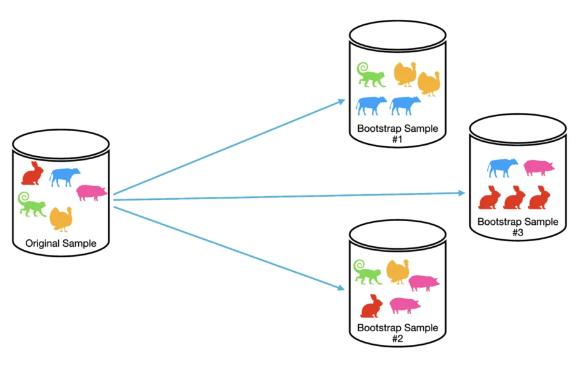

> N_estimators : 랜덤포레스트에서 만들어지는 트리의 개수 트리가 많아지면 학습시간이 오래걸린다. 일반적으로 개별트리의 성능을 적당히 조절하면 트리의 개수가 많을 수록 성능자체는 좋아지지만 적절한 개수설정이 필요

## 학습시키기(basic_rf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 다시 4개 피처 모두사용해서 랜덤포레스트 시도⭐
X = df[iris.feature_names]  # 모든 행과 특성 열 선택
y = df['target']            # 타깃 열


# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. 랜덤 포레스트 모델 생성
basic_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
                                  # 기본값 파라미터 사용⭐

# 4. 모델 훈련
basic_rf.fit(X_train, y_train)

# 5. 예측
y_pred_train = basic_rf.predict(X_train)  # 훈련 데이터에 대한 예측
y_pred_test = basic_rf.predict(X_test)  # 테스트 데이터에 대한 예측

# 6. 정확도 계산
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# 7. 결과 출력
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Train Accuracy: 0.9833
Test Accuracy: 0.9667




*   



최적의 파라미터 값을 효율적으로 찾는데도 교차검증을 이용할 수 있음.

##✅ GridSearchCV (그리드 서치 교차검증)
>모든 가능한 파라미터 조합에 대해 자동으로 탐색하여 최적의 파라미터 조합을 찾는 방법



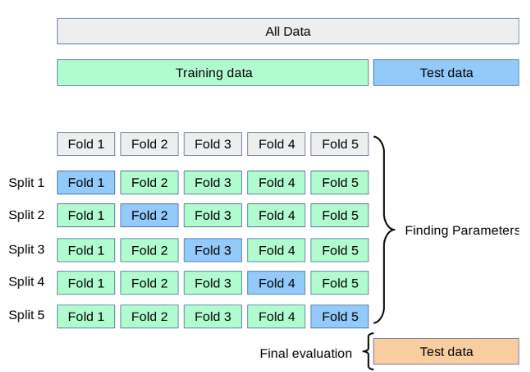


>param_grid = {
'n_estimators': [10, 50, 100, 200],
'max_features': [2, 3, 4],
'max_depth': [2, 3, 4, 5,]
}
>
> 4x8x4= 48개의 조합 중 accuracy가 높은 최적의 파라미터 탐색

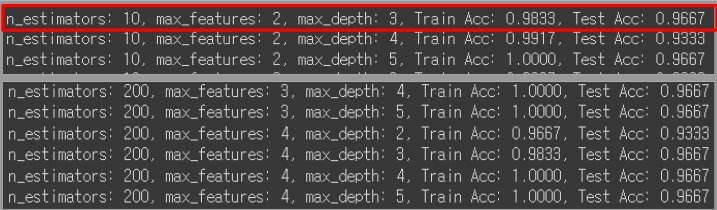

'n_estimators(트리개수)' : 10,

'max_depth': 3,

'max_features': 2

📚즉 **가장 적당한 개별트리를 만들면서 & 효율적인** 파라미터 조합을 찾을 수 있었다.

+) wine데이터같은 더 복잡한 분류 dataset의 경우에는 더 큰 수치의 depth or n_estimators(트리개수)가 필요할 것이라 예상해 볼 수 있음.

##GridSearchCV로 찾은 최적의 파라미터로 훈련 및 교차검증으로 확인 (best_rf)

In [ ]:
# n_estimators 값 설정
n_estimators_list = [10, 50, 100, 1000] #⭐확인용

# 결과 저장 및 모델 학습
for n_estimators in n_estimators_list:
    #⭐ 위에서 찾은 최적의 파라미터 값을 이용해 랜덤 포레스트 모델 생성 (max_depth=3, max_features=2)
    best_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, max_features=2, random_state=42)#⭐

    cross_val_scores = cross_val_score(best_rf, X_train, y_train, cv=4, scoring='accuracy')

    # 교차 검증 정확도의 평균 계산
    mean_cv_score = cross_val_scores.mean()

    # 훈련 세트에서의 교차 검증 정확도 출력
    print(f'n_estimators: {n_estimators}, Cross-Validated Train Accuracy: {mean_cv_score:.4f}')

    # 모델 학습 후 테스트 세트 정확도 계산
    best_rf.fit(X_train, y_train)
    test_accuracy = best_rf.score(X_test, y_test)

    # 테스트 세트 정확도 출력
    print(f'n_estimators: {n_estimators}, Test Accuracy: {test_accuracy:.4f}')

n_estimators: 10, Cross-Validated Train Accuracy: 0.9667
n_estimators: 10, Test Accuracy: 0.9667
n_estimators: 50, Cross-Validated Train Accuracy: 0.9583
n_estimators: 50, Test Accuracy: 0.9667
n_estimators: 100, Cross-Validated Train Accuracy: 0.9583
n_estimators: 100, Test Accuracy: 0.9667
n_estimators: 1000, Cross-Validated Train Accuracy: 0.9500
n_estimators: 1000, Test Accuracy: 0.9667



📚결과치를 보면 epoch수가 많으면 overfitting문제가 있던 앞에 분류모델들과 달리 트리개수자체가 많다고 오버피팅문제가 발생하진 않음.

 개별트리 파라미터만 적당히 잘 조정하면 과적합에 덜 민감한 모델임을 확인할 수 있다.


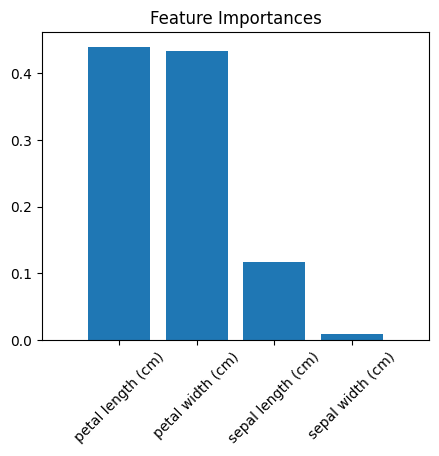

In [ ]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # 중요도 높은 순으로 정렬

plt.figure(figsize=(5, 4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

##결정경계면 그려보기(피처 2개만사용)

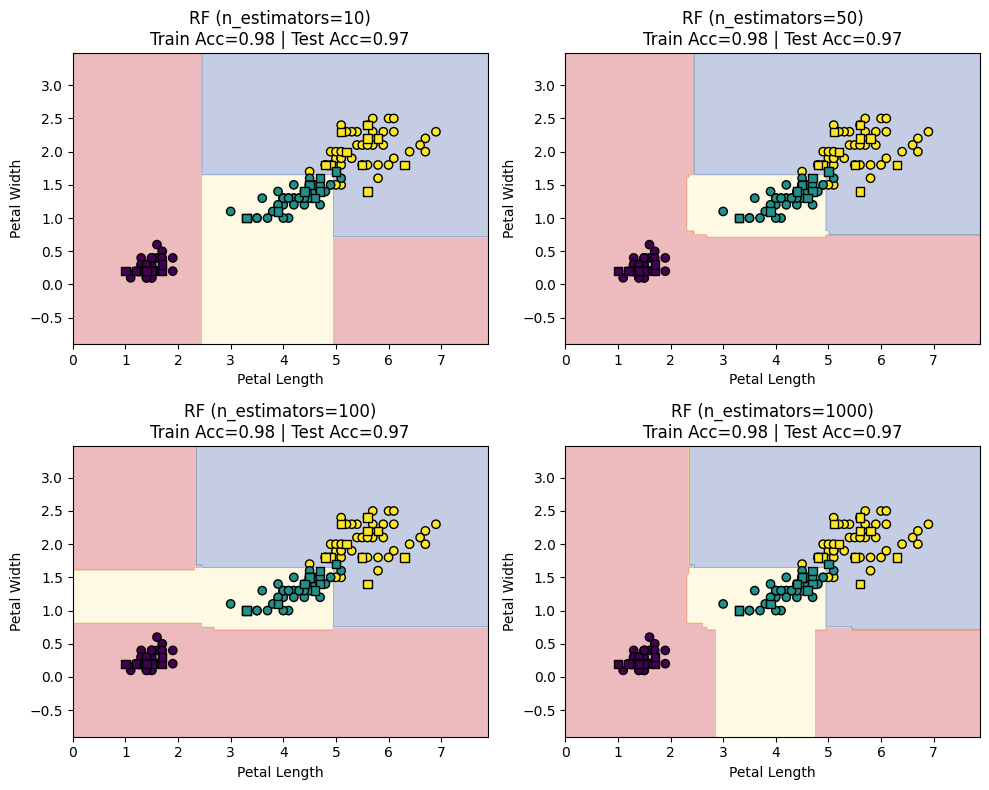

In [5]:


# 1. 아이리스 데이터셋 로드 및 2개의 특성 선택
iris = load_iris()
X = iris.data[:, [2, 3]]  #⭐피처 중요도 높은 피처 2개만 사용
y = iris.target

# 2. 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# n_estimators 값 설정
n_estimators_list = [10, 50, 100, 1000]

# 2x2 서브플롯을 위한 설정
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 subplot 생성
axes = axes.ravel()  # 2D 배열을 1D로 변환

# 결과 저장 및 모델 학습
for idx, n_estimators in enumerate(n_estimators_list):
    # 위에서 찾은 최적의 파라미터 값을 이용해 랜덤 포레스트 모델 생성 (max_depth=3, max_features=2)
    best_rf_2features = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, max_features=2, random_state=42) #⭐
    best_rf_2features.fit(X_train, y_train)

    # 훈련 데이터에 대한 예측 및 정확도 계산
    y_train_pred = best_rf_2features.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # 테스트 데이터에 대한 예측 및 정확도 계산
    y_test_pred = best_rf_2features.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # 4. 결정 경계 시각화를 위한 그리드 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # 5. 각 포인트에서 예측값 계산
    Z = best_rf_2features.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 6. 결정 경계 시각화
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # 학습 데이터 포인트 시각화
    axes[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train')

    # 테스트 데이터 포인트 시각화
    axes[idx].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='s', label='Test')

    # 서브플롯 제목에 훈련 및 테스트 정확도 추가
    axes[idx].set_title(f'RF (n_estimators={n_estimators})\nTrain Acc={train_accuracy:.2f} | Test Acc={test_accuracy:.2f}')
    axes[idx].set_xlabel('Petal Length')
    axes[idx].set_ylabel('Petal Width')

# 그래프 레이아웃 설정
plt.tight_layout()
plt.show()


#CH3.👭knn(k 최근접 이웃 알고리즘) 아이리스 데이터 분류


> knn은 3차원이상으로 넘어가면 가까운 데이터포인트여도 서로 가깝다고 인식하기 어렵기때문에
>
>⭐**피처가 2개인 비교적 단순한 분류데이터셋에서만 용이**⭐

> 또한 스케일링이 굉장히 중요한 모델
>
>=> 만약 한 피처의 값 범위가 매우 크다면, 그 피처가 전체 거리 계산에 큰 영향을 미치게 되어 다른 피처들의 상대적 중요도를 낮춤.


 petal lenght:0-7 / width: 0-2.5
 두피처의 값 range가 크게 차이가 나진 않지만, 거리에 기반한 모델인 만큼 안전하게 우선 적용


##knn 분류_(2features)

Accuracy: 0.9667


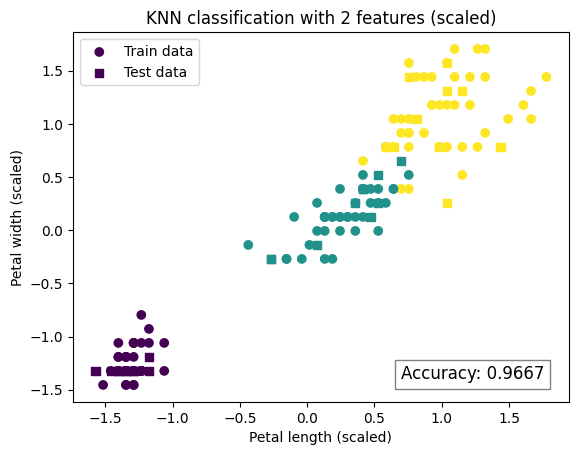

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. 데이터 로드
iris = load_iris()

# 2. 두 개의 피처만 선택 (예: 꽃잎 길이와 꽃잎 너비)
X = iris.data[:, 2:4]  # Petal length, Petal width 사용
y = iris.target

# 3. 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 데이터 스케일링 (StandardScaler 사용)⭐
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # 훈련 데이터를 기준으로 스케일링
X_test = scaler.transform(X_test)        # 테스트 데이터도 동일한 스케일로 변환

# 5. KNN 분류기 생성
knn = KNeighborsClassifier(n_neighbors=5) #⭐우선 디폴트값 사용

# 6. 모델 학습
knn.fit(X_train, y_train)#⭐학습 과정에서 모델훈련시키기 보다는, 단순히 훈련 데이터 전체를 저장
                         #⭐매번 새로운 데이터 포인트가 들어올 때마다 유클리디안 거리도 최근접이웃들 클래스를 통해 예측

# 7. 예측 및 정확도 계산
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 8. 데이터 시각화 (선택)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test data')
plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.title('KNN classification with 2 features (scaled)')

# Accuracy 값 그래프에 추가
plt.text(0.95, 0.05, f'Accuracy: {accuracy:.4f}', horizontalalignment='right', verticalalignment='bottom',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.show()


##역시 그리드 서치 교차 검증으로 최적의 파라미터 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. KNN 모델 및 파라미터 그리드 설정
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1,3, 5, 7, 9,]}  # k 값

# 2. GridSearchCV를 사용한 교차 검증
grid_search = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy') #⭐여기도 cv=4 적용
grid_search.fit(X_train, y_train)

# 3. 최적의 k 값과 성능 출력
print(f'Best k: {grid_search.best_params_["n_neighbors"]}')
print(f'Best cross-validated accuracy: {grid_search.best_score_:.4f}')


Best k: 5
Best cross-validated accuracy: 0.9667


k=5 최적의 파라미터 확인

##교차검증을 사용안하고 한번의 실험에서 나온 accuracy에 따라서 k를 정한다면?

K=1, Test Accuracy: 0.9667
K=2, Test Accuracy: 0.9333
K=3, Test Accuracy: 0.9667
K=4, Test Accuracy: 1.0000
K=5, Test Accuracy: 0.9667
K=6, Test Accuracy: 0.9333
K=7, Test Accuracy: 0.9333
K=8, Test Accuracy: 0.9333


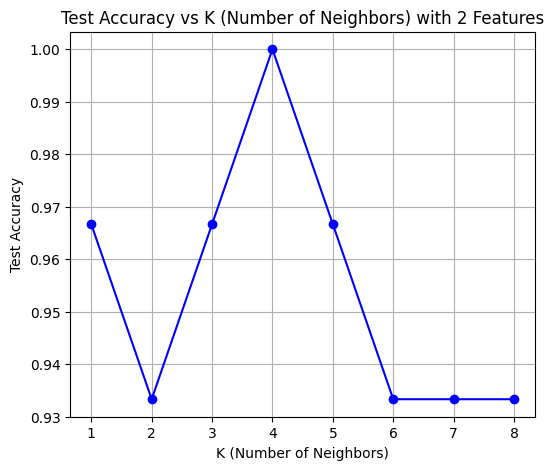

In [ ]:
# 각 K에 대한 테스트 정확도 저장
test_accuracies = []
k_range=[1,2,3,4,5,6,7,8]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    print(f'K={k}, Test Accuracy: {accuracy:.4f}')

# 그래프 그리기
plt.figure(figsize=(6, 5))
plt.plot(list(k_range), test_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs K (Number of Neighbors) with 2 Features')
plt.grid(True)
plt.show()

📚 매번 다른 그래프양상이 출력됨

=> 교차검증의 중요성 확인할 수 있었음. 즉 보다 일반적인 or 보수적인 데이터분류를 위해서 꼭 필요한 절차임을 확인

##결정경계면 그리기

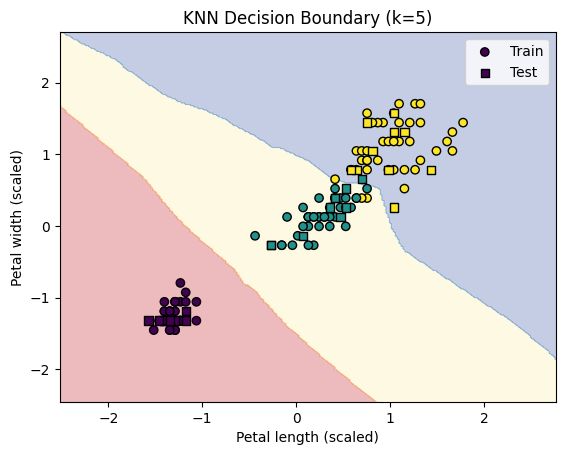

In [ ]:
# 5. 결정 경계면을 그리기 위한 영역 설정
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 6. 각 좌표에 대해 클래스 예측 (결정 경계면을 그리기 위해)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. 결정 경계 시각화
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# 8. 학습 데이터와 테스트 데이터 포인트 시각화
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', label='Test')

plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.title('KNN Decision Boundary (k=5)')
plt.legend()
plt.show()